In [55]:
from sqlalchemy import create_engine, inspect
#Per culpa de la meva contraseña @
import urllib.parse

#Dades de connexió

usuario='root'

contraseña="123"
#contraseña_codificada = urllib.parse.quote_plus(contraseña)  # Codificar la contraseña
host='localhost'
puerto=3306
nombre_base_datos='bbdd_tasca_4'

#Crear la URL de la connexió

url_conexion=f"mysql+pymysql://{usuario}:{contraseña}@{host}:{puerto}/{nombre_base_datos}"

try:
    #Crear el engine de SQLAlchemy
    engine=create_engine(url_conexion)
    cnx=engine.connect()

    print("conexió correcta")
    #cnx.close()
except Exception as e:
    print(f"Error al conectar con SQLAlchemy: {e}")

conexió correcta


In [56]:
#Recordar que inspect del codi anterior quan creo la connexió amb sqlalchemy
#from sqlalchemy import create_engine, inspect
import pandas as pd

inspector=inspect(engine)
nombre_tablas=inspector.get_table_names()
#df=pd.DataFrame()
#print(df)

# Diccionario para almacenar los DataFrames
df= {}

for taula in nombre_tablas:
    query=f"select * from {taula}"
    
    try:
        df[taula] = pd.read_sql(query, cnx)
        print(f"Taula '{taula}' carregada correctament.")
    except Exception as e:
        print(f"Error al carregar la taula '{taula}':{e}")
  
# Tancar la connexió
cnx.close()


Taula 'companies' carregada correctament.
Taula 'credit_card' carregada correctament.
Taula 'num_trans_and_decl_x_companies' carregada correctament.
Taula 'products_ids' carregada correctament.
Taula 'trans_x_product' carregada correctament.
Taula 'transactions' carregada correctament.
Taula 'users' carregada correctament.


#### Visualizació d'un parell de files per taula, i informació dels nulls per variable

Podem comprovar que no tenim cap valor null a les diferents variables de les taules.

In [57]:
for key in df.keys():
    print(f"\n Tabla:{key}")
    print(df[key].head(2))
    print("\nInfo\n")
    print(df[key].info())




 Tabla:companies
  company_id               company_name           phone  \
0     b-2222  Ac Fermentum Incorporated  06 85 56 52 33   
1     b-2226   Magna A Neque Industries  04 14 44 64 62   

                              email    country                       website  
0  donec.porttitor.tellus@yahoo.net    Germany    https://instagram.com/site  
1       risus.donec.nibh@icloud.org  Australia  https://whatsapp.com/group/9  

Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_id    100 non-null    object
 1   company_name  100 non-null    object
 2   phone         100 non-null    object
 3   email         100 non-null    object
 4   country       100 non-null    object
 5   website       100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB
None

 Tabla:credit_card
         id  user_id                          iban      

## **Nivell 1**

#### **Exercici 1**

##### Representar una variable numèrica.
 

**Tria de les variables i justificació del gràfic escollit**:
Com que només tinc una variable a representar, puc representar un histograma de la distribució de les vendes realitzades per transaccció, ja que tinc 587 transaccions i és 
un volum de dades important per tal de poder-les visualitzar en un histograma. 




In [58]:
#Importo les llibreries que em faran falta per tot l'exercici
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [59]:
df['transactions'].head(3)

,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,-12.5276
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9695,-117.5250
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.2227,-129.0500


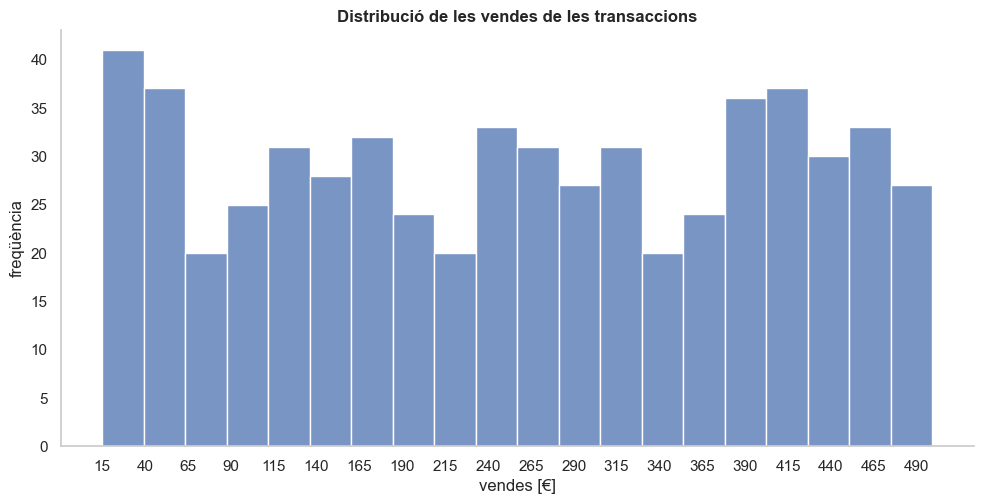

In [60]:
#Retorna una variable de FaceGrid, un objecte de seaborns 
#type(plot)
#seaborn.axisgrid.FacetGrid

#Amb height i aspect puc controlar l'amplada del gràfic
plot=sns.displot(df["transactions"]["amount"],bins=20,height=5, aspect=2)
plot.set_axis_labels('vendes [€]', 'freqüència')

#ax sí es de tipus Matplotlib
#type(plot.ax)
#matplotlib.axes._axes.Axes
ax=plot.ax
ax.set_title('Distribució de les vendes de les transaccions',fontweight='bold')

#Primer grafico el gràfic, i després veig que aquestes serien les millors 
#etiques per l'eix x
min_amount=int(min(df["transactions"]["amount"]))
max_amount=int(max(df["transactions"]["amount"]))

#Per tal que coincideix els valors de l'eix amb les barres faig aquest bucle
list_x=[i for i in range(15,500,25)]
#ax.set_xticks(min(min_amount),50,100,150,200,250,300,350,400,450,500])
ax.set_xticks(list_x)
#plt.figure(10,4)
# Treure les quadrícules del fons
ax.grid(False)
plt.show()


**Comentaris del gràfic**:
Respecte a la construcció de l'histograma hem de dir, que hem triat una amplada del tamany de l'interval lo suficientment petita per tal que es poguéssin treure més conclusions de la forma de la seva distribució
També s'han adaptat les etiquetes numèriques de l'eix x per tal que fossin coincidents amb els  tamanys dels intervals, i així facilités l'anàlisis posterior.
Si visualitzem la distribució, veiem que es força plana i no té forma de campana de Gauss. La Mitjana és de 256 € per transacció (ho viem amb df["transactions"]["amount"].describe()). També s’observa que les vendes que s’han produït més son transaccions de quantitats baixes entre  el rang entre 5 y 40 € amb una freqüència de 40 transaccións, bastant més que altres grups. També veiem que hi ha com tres subpoblacions dins del histograma. S'aprecien com tres muntanyes de grups, hi ha com una petita distribució de transaccions centrada a 150 €, una altra distribució a 275 € i un altra a 425 €. Al ser una una distribució força plana no considerem que hi hagin valors que es puguin considerar outliers.


In [61]:
df["transactions"]["amount"].describe()
df["transactions"]["amount"].info()


<class 'pandas.core.series.Series'>
RangeIndex: 587 entries, 0 to 586
Series name: amount
Non-Null Count  Dtype  
--------------  -----  
587 non-null    float64
dtypes: float64(1)
memory usage: 4.7 KB


#### **Exercici 2**

##### Dues variables numèriques

**Tria de les variables i justificació del gràfic escollit**: Escolliré representar el preu i el pes de la taula products per veure si hi ha alguna correlació. Com que es tracta de relacionar dues variables numèriques, es un clàssic utilitzar un grafic de dispersió. Com es pot veure tenim l'eix y el preu de cada un dels productes en euros i l'eix y el seu pes en kg.





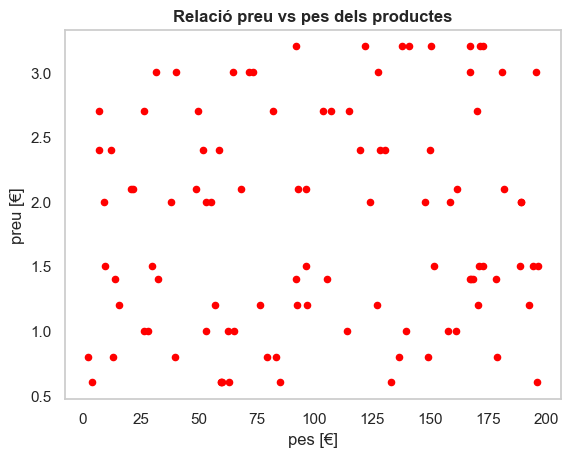

In [62]:
ax=df["products_ids"].plot.scatter(x="price",y="weight", color="red")

ax.set_title("Relació preu vs pes dels productes",fontweight='bold')
ax.set_xlabel("pes [€]")
ax.set_ylabel("preu [€]")

# Treure les quadrícules del fons
ax.grid(False)
plt.show()

**Comentaris del gràfic**:Podem comprovar que no hi ha cap relació entre el preu i el pes dels productes, ja que sinó podríem dibuixar alguna línea de tendència entre aquestes dues variables. De fet podem quantificar com és de fluixa aquesta relació (correlació) calculant el mètode corr de la Serie pandas entre aquestes dues variables. Fent el càlcul ens surt de 0,105, molt baixa, doncs una alta correlació serien valors pròxims a 1 en valor absolut. Si que creiem que el gràfic triat és acertat, doncs podem visualitzar tots els parells de valors fàcilment. Cal destacar, que en aquest cas tampoc es veuen outliers, punts que estàn molt allunyats de la resta. Com a millora adicional, fora d'aquest exercici, es podrien segmentar tot aquests núvols de punts per les categòries dels diferents productes amb diferents colors, ja que així podríem identificar clústers amb certes relacions que ara mateix no podem visualitzar.  


In [63]:
df["products_ids"]["price"].corr(df["products_ids"]["weight"])

np.float64(0.10543096698640225)

#### **Exercici 3**

##### Una variable categòrica

**Tria de la variable i justificació del gràfic escollit**: Escolliré com a variable categòrica, el país de la taula d'usuaris que només presenta tres paísos i utilizaré un gràfic de sectors per 
veure quin és el percentatge d'usuaris de cada un dels 3 països. Em sembla adient fer servir el diagrama de sectors, doncs només estem visualitzant una categoria, per tant no hem de fer comparacions entre diferents variables categòriques, i a més, la variable categòrica utilitzada només té tres valors a visualitzar. Si en tingués molts, el diagrama de sectors no seria adequat ja que podria ser difícil identificar proporcions petites dels valors de la variable categoria. 

In [64]:
df["users"]["country"]=df["users"]["country"].astype("category")
df["users"]["country"].info()


<class 'pandas.core.series.Series'>
RangeIndex: 275 entries, 0 to 274
Series name: country
Non-Null Count  Dtype   
--------------  -----   
275 non-null    category
dtypes: category(1)
memory usage: 539.0 bytes


In [65]:
#Faig servir una funció se series per comptar les vegades per país
serie_count_x_country=df["users"]["country"].value_counts()
#Converteixo la serie a dataframe doncs em va millor per pintar amb pandas
df_serie_count_x_country=pd.DataFrame(serie_count_x_country)

Text(0.5, 1.0, "Nombre d'usuaris per país")

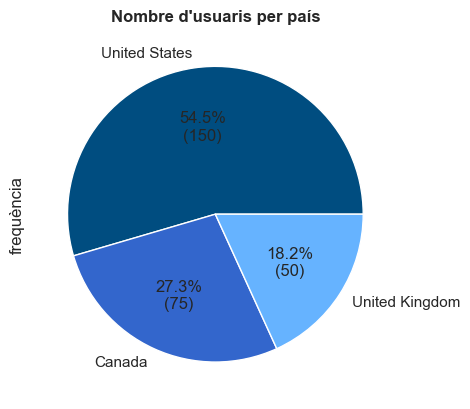

In [66]:
#funció per mostrar els valors i porcentatges del pie
def func(pct, allvalues):
    absolute = int(round(pct/100.*sum(allvalues)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

#Especifico una tonalitat de colors blaus per pintar el gràfic de sectors per estètica. De blau més fort a blau més clar
colors = ['#004d80','#3366cc','#66b3ff']

ax=df_serie_count_x_country["count"].plot.pie(autopct=lambda pct: func(pct, df_serie_count_x_country["count"]),colors=colors)

ax.set_ylabel("frequència")
ax.set_title("Nombre d'usuaris per país",fontweight='bold')


**Comentaris del gràfic**: Sembla ser que més de la meïtat dels usuaris potencials que poden comprar en el nostre ecommerce (54,5%) es troben a EUA. Això pot ser problemàtic si vingués una crisis forta a EUA, doncs podríem perdre masses potèncials compradors. 
Tot i així amb aquest gràfic no podem dir masses coses, perquè ara mateix 
no sabem de cada un dels sectors, quin percentatge d'usuaris ha participat en les transaccions de les vendes per empresa. En tot cas, intentar captar nous usuaris que es donin
d'alta a l'ecommerce, no sería una mala estratègia per diversificar el risc i disposar d'una cartera de potencials compradors més equilibrada.

#### **Exercici 4**

##### Una variable categòrica i una numèrica

**Tria de la variable i justiciació del gràfic escollit**: En aquest cas representerem les vendes mensuals de tota las sèrie històrica de les transaccions acceptades. Per tant confrontarem una sèrie numèrica. Hem triat aquest gràfic per varis motius. En primer lloc, perquè ens ha semblat interessant treballar amb dates amb phython i per tan així aprendrem més a fer servir la llibreria datetime, així com fer servir el mètode groupby de pandas. També podem dir que la data la considserem categòrica ordinal, ja que només ens serveix per representar els valors de les vendes en un ordre temporal. 

In [67]:
#Com que tractarem dates importaré llibreries de datetime
from datetime import date, time, datetime

In [68]:
#per veure que transactions la data ja és de tipustimestamp
df["transactions"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           587 non-null    object        
 1   card_id      587 non-null    object        
 2   business_id  587 non-null    object        
 3   timestamp    587 non-null    datetime64[ns]
 4   amount       587 non-null    float64       
 5   declined     587 non-null    int64         
 6   product_ids  587 non-null    object        
 7   user_id      587 non-null    int64         
 8   lat          587 non-null    float64       
 9   longitude    587 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 46.0+ KB


In [69]:
#Important, una data en concret de la serie, no té l'atribut dt, sinó que directament com que és un del tipus timestamp de panda
#pot retornar directament el dia el mes etc.(NOTES PEL GORKA FUTURS REPASSOS)
df["transactions"]["timestamp"].iloc[0].day
df["transactions"]["timestamp"].iloc[0].month

8

In [70]:
#Aquí es veu que és del tipus timestamp, una data en concret (NOTES PEL GORKA FUTURS REPASSOS)
type(df["transactions"]["timestamp"].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [71]:
#Això sí retorna una Serie, i una sèrie si té el atribut dt, i aquest té altres atributs i mètodes! (NOTES PEL GORKA FUTURS REPASSOS)
type(df["transactions"]["timestamp"])

pandas.core.series.Series

In [72]:
#Sobre una sèrie puc obtenir tots els dies de la sèrie (NOTES PEL GORKA FUTURS REPASSOS)
df["transactions"]["timestamp"].dt.day

0      28
1      26
2       6
3      26
4      26
       ..
582    13
583    16
584    13
585     9
586    15
Name: timestamp, Length: 587, dtype: int32

Converteixo la data timestamp a dates del tipus mes, per tal de poder agrupar per mes, i fer que la serie temporal sigui mensual i no per dia

In [73]:
def mes_any(data_timestamp):

    mes=data_timestamp.month
    any=data_timestamp.year
    dia=1
    return (pd.Timestamp(any,mes,dia))

df["transactions"]["timestamp"].apply(mes_any)


0     2021-08-01
1     2021-07-01
2     2022-01-01
3     2022-01-01
4     2021-10-01
         ...    
582   2022-03-01
583   2022-03-01
584   2021-06-01
585   2021-11-01
586   2021-06-01
Name: timestamp, Length: 587, dtype: datetime64[ns]

In [74]:
#Sobrescribeixo la taula per obtenir la data mes_any
df["transactions"]["data_mes_any"]=df["transactions"]["timestamp"].apply(mes_any)
df["transactions"].head(2)

,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude,data_mes_any
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,-12.5276,2021-08-01
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9695,-117.5250,2021-07-01


In [75]:
#Aquí m'interessa tenir una nova columna que tingui l'any per separat, per si ho necessitem en un altre moment
df["transactions"]["Any"]=df["transactions"]["timestamp"].dt.year

In [76]:
#Aplico un filtre per tenir les transaccions no declinades
es_no_declinada=df["transactions"]["declined"]==0
trans_no_decl=df["transactions"][es_no_declinada]
trans_no_decl.head(2)

,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude,data_mes_any,Any
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,-12.5276,2021-08-01,2021
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9695,-117.5250,2021-07-01,2021


In [77]:
#Calculo la suma de les vendes per data mes_any i ho assigno a una Sèrie que és la que representaré.
agrup_mes_any=trans_no_decl.groupby("data_mes_any")
Serie_vendes_x_mes_any=agrup_mes_any["amount"].sum()
Serie_vendes_x_mes_any

data_mes_any
2021-03-01     5711.35
2021-04-01    13507.68
2021-05-01    11659.27
2021-06-01    10817.81
2021-07-01     9931.77
2021-08-01    13900.24
2021-09-01     9524.43
2021-10-01    10765.57
2021-11-01     7675.74
2021-12-01    14177.16
2022-01-01     8236.31
2022-02-01    10077.55
2022-03-01     3520.71
Name: amount, dtype: float64

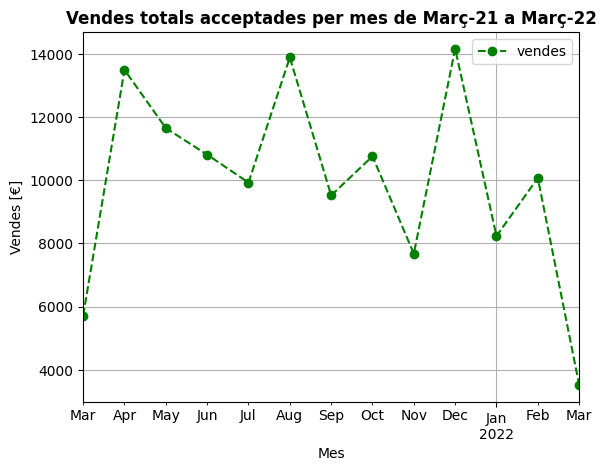

In [78]:
plt.style.use("default")
#Ara per variar posem totes les propietats dins de la funció plot.
#Realment queda més net modificar les propietats per fora, amb mètodes que pengin de ax, però aquí ho farem així
ax=Serie_vendes_x_mes_any.plot(kind="line",
                               title="Vendes totals acceptades per mes Març-21 a Març 22",
                               use_index="True",
                               legend=True,
                               linestyle="dashed",
                               color="green",
                               marker="o",
                               grid=True,
                               ylabel="Vendes [€]",
                               xlabel="Mes")                           


ax.set_title("Vendes totals acceptades per mes de Març-21 a Març-22",fontweight='bold')
legend=ax.legend()


#Obtenir tots els elements de la llegenda
handles, labels = ax.get_legend_handles_labels()

#Modificar el nom de la serie desitjada
new_label = "vendes"
#Modificar el nom de la primera serie, index 0
labels[0] = new_label

# Actualitzar la llegenda amb els nous noms de la serie
ax.legend(handles, labels)

plt.show()

#Si volgués modificar la posició més acurada del títol, com que tinc un objecte de matplolib
#puc modificar el que vulgui amb els mètodes de ax de matplolib.
#ax.set_title(label="Vendes totals per mes Març-21 a Març 22",pad=20,loc="center",x=0.5,y=1.0)


**Comentaris del gràfic**: Veiem que al Març-21 les vendes de les transaccions  eren força baixes però després van remuntar. Es comprova un comportament
cíclic a partir de l'Abril, almenys per l'any 2021. A l'Abril, a l'Agost i al Decembre del 2021 va haver un pic de vendes important, i el més curiós de tot és que els valors dels pics dels vendes són molt semblants. Això ens fa pensar que per la tipologia de productes que s'ofereixen, els usuaris estàn més disposats de comprar-los en aquests mesos, s'hauria d'estudiar. La notícia negativa és que al Març del 22 les vendes totals són molt menys de la meïtat de les que es van vendre al 2021. Haurem de tenir més informació del 2022 (ara mateix només disposem de tres mesos), per veure si aquest comportament serà la nova tendència, o és un punt anòmal.

#### **Exercici 5**

##### Dues variables categòriques

**Tria de les variables i justiciació del gràfic escollit**: Escollirem com variables els paísos de les empreses front els paísos dels usuaris, dos variables categòriques. 
Triarem un gràfic de barres horitzontals i columnes apilades. La primera categoria de l'eix y seràn els països de les empreses i la segona categoria on es representaran per barres agrupades, els diferents països dels ususaris que han participat en les compres  Quan tinguem el gràfic es veurà més clar. Ens ha semblat un gràfic força interessant, més que res per la complexitat de les dues variables categòriques són de diferents taules relacionades, i que també haurem d'utilitzar el mètode groupby per dues variables.

In [79]:
trans_no_decl.head()

,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude,data_mes_any,Any
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,-12.5276,2021-08-01,2021
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9695,-117.5250,2021-07-01,2021
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.2227,-129.0500,2022-01-01,2022
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.3593,-100.5560,2022-01-01,2022
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.7381,158.2980,2021-10-01,2021


In [80]:
tr_no_decl_merge_comp=trans_no_decl.merge(df["companies"],how="inner",left_on="business_id",right_on="company_id")
tr_no_decl_merge_comp.head(2)

,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude,data_mes_any,Any,company_id,company_name,phone,email,country,website
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,-12.5276,2021-08-01,2021,b-2362,Lorem Eu Incorporated,01 83 66 62 07,enim.gravida.sit@hotmail.net,Canada,https://baidu.com/en-ca
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9695,-117.5250,2021-07-01,2021,b-2302,Nunc Interdum Incorporated,05 18 15 48 13,non@outlook.com,Germany,https://wikipedia.org/en-us


In [81]:
tr_no_decl_merge_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            500 non-null    object        
 1   card_id       500 non-null    object        
 2   business_id   500 non-null    object        
 3   timestamp     500 non-null    datetime64[ns]
 4   amount        500 non-null    float64       
 5   declined      500 non-null    int64         
 6   product_ids   500 non-null    object        
 7   user_id       500 non-null    int64         
 8   lat           500 non-null    float64       
 9   longitude     500 non-null    float64       
 10  data_mes_any  500 non-null    datetime64[ns]
 11  Any           500 non-null    int32         
 12  company_id    500 non-null    object        
 13  company_name  500 non-null    object        
 14  phone         500 non-null    object        
 15  email         500 non-null    object    

In [82]:
#vull canviar alguns noms de columnes per tal que ni hi hagi confusió quan torni a fer un altre merge
tr_no_decl_merge_comp=tr_no_decl_merge_comp.rename(columns={"id":"id_transac","country":"country_comp"})

tr_no_decl_merge_comp_merge_users=tr_no_decl_merge_comp.merge(df["users"],how="inner",left_on="user_id",right_on="id")
tr_no_decl_merge_comp_merge_users.head(2)


,id_transac,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude,...,id,name,surname,phone_y,email_y,birth_date,country,city,postal_code,address
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,-12.5276,...,92,Lynn,Riddle,1-387-885-4057,vitae.aliquet@outlook.edu,"Sep 21, 1984",United States,Bozeman,61871,"P.O. Box 712, 7907 Est St."
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9695,-117.5250,...,170,William,Benjamin,0800 1111,porttitor@icloud.ca,"May 15, 1987",United Kingdom,Coldstream,KY0 0DY,662-8112 Praesent Av.


In [83]:
#Hem llegit que és més eficient convertir una variable categòrica al tipus category, doncs és més eficient per búsquedes i representacions.
tr_no_decl_merge_comp_merge_users["country_comp"]=tr_no_decl_merge_comp_merge_users["country_comp"].astype("category")
tr_no_decl_merge_comp_merge_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_transac    500 non-null    object        
 1   card_id       500 non-null    object        
 2   business_id   500 non-null    object        
 3   timestamp     500 non-null    datetime64[ns]
 4   amount        500 non-null    float64       
 5   declined      500 non-null    int64         
 6   product_ids   500 non-null    object        
 7   user_id       500 non-null    int64         
 8   lat           500 non-null    float64       
 9   longitude     500 non-null    float64       
 10  data_mes_any  500 non-null    datetime64[ns]
 11  Any           500 non-null    int32         
 12  company_id    500 non-null    object        
 13  company_name  500 non-null    object        
 14  phone_x       500 non-null    object        
 15  email_x       500 non-null    object    

In [84]:
tr_no_decl_merge_comp_merge_users=tr_no_decl_merge_comp_merge_users.rename(columns={"country":"country_user"})
tr_no_decl_merge_comp_merge_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_transac    500 non-null    object        
 1   card_id       500 non-null    object        
 2   business_id   500 non-null    object        
 3   timestamp     500 non-null    datetime64[ns]
 4   amount        500 non-null    float64       
 5   declined      500 non-null    int64         
 6   product_ids   500 non-null    object        
 7   user_id       500 non-null    int64         
 8   lat           500 non-null    float64       
 9   longitude     500 non-null    float64       
 10  data_mes_any  500 non-null    datetime64[ns]
 11  Any           500 non-null    int32         
 12  company_id    500 non-null    object        
 13  company_name  500 non-null    object        
 14  phone_x       500 non-null    object        
 15  email_x       500 non-null    object    

In [85]:
#Ara fem l'agrupació que haviem dit per país d'empresa i per país d'usuari.
agr_tr_no_decl_country_comp_country_user=tr_no_decl_merge_comp_merge_users.groupby(["country_comp","country_user"])


C:\Users\Usuario\AppData\Local\Temp\ipykernel_34132\3950215164.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agr_tr_no_decl_country_comp_country_user=tr_no_decl_merge_comp_merge_users.groupby(["country_comp","country_user"])


In [86]:
Serie_country_comp_country_user=agr_tr_no_decl_country_comp_country_user["id_transac"].count()

In [87]:
#Com que volem fer servir mètodes de panda per visualitzar per temes de practicar més, en aquest cas convertim la Serie a un DataFrame
df_country_comp_country_user=pd.DataFrame(Serie_country_comp_country_user)
df_country_comp_country_user.head(8)

id_transac
country_comp country_user              
Australia    Canada                   6
             United Kingdom           0
             United States            0
Belgium      Canada                   8
             United Kingdom           0
             United States            0
Canada       Canada                   5
             United Kingdom           0

In [88]:
#Si tenim un índex al DataFrame la fórmula per visualitzar és més simplificada.
#Resetegem l'index anterior i automàticament afegim el nou que sigui country_comp
df_country_comp_country_user=(df_country_comp_country_user.reset_index()).set_index("country_comp")
#Aquest valor és per verificar que el número de transaccions no declinades son 500, com ja sabiém des del Sprint 4.
df_country_comp_country_user["id_transac"].sum()


np.int64(500)

In [89]:
df_country_comp_country_user.head()

,country_user,id_transac
country_comp,,
Australia,Canada,6
Australia,United Kingdom,0
Australia,United States,0
Belgium,Canada,8
Belgium,United Kingdom,0


In [90]:
df_reset = df_country_comp_country_user.reset_index()

#Ens adonem, que l'estructura anterior de com estan les variables, no ens serveix per utilizar el mètode plot.barh de pandas, doncs no éstan les columnes com ens interessen.
#Es per això que hem d'utilitzar la funció pivot, pero bans hem de resetjar l'index per poder-ho fer.
pivot_df = df_reset.pivot(index="country_comp", columns="country_user", values="id_transac")
pivot_df.head(8)

country_user,Canada,United Kingdom,United States
country_comp,,,
Australia,6,0,0
Belgium,8,0,0
Canada,5,0,52
China,2,0,0
France,3,0,0
Germany,60,42,9
Ireland,56,0,0
Italy,9,0,0


In [91]:
#Omplim fillna a 0, cons hem vist que pot donar Nan
pivot_df=pivot_df.fillna(0)
pivot_df["Total"]=pivot_df["Canada"]+pivot_df["United Kingdom"]+pivot_df["United States"]
pivot_df=pivot_df.sort_values("Total",ascending=True)
pivot_df.head(5)

country_user,Canada,United Kingdom,United States,Total
country_comp,,,,
Spain,1,0,0,1
China,2,0,0,2
France,3,0,0,3
Australia,6,0,0,6
New Zealand,6,0,0,6


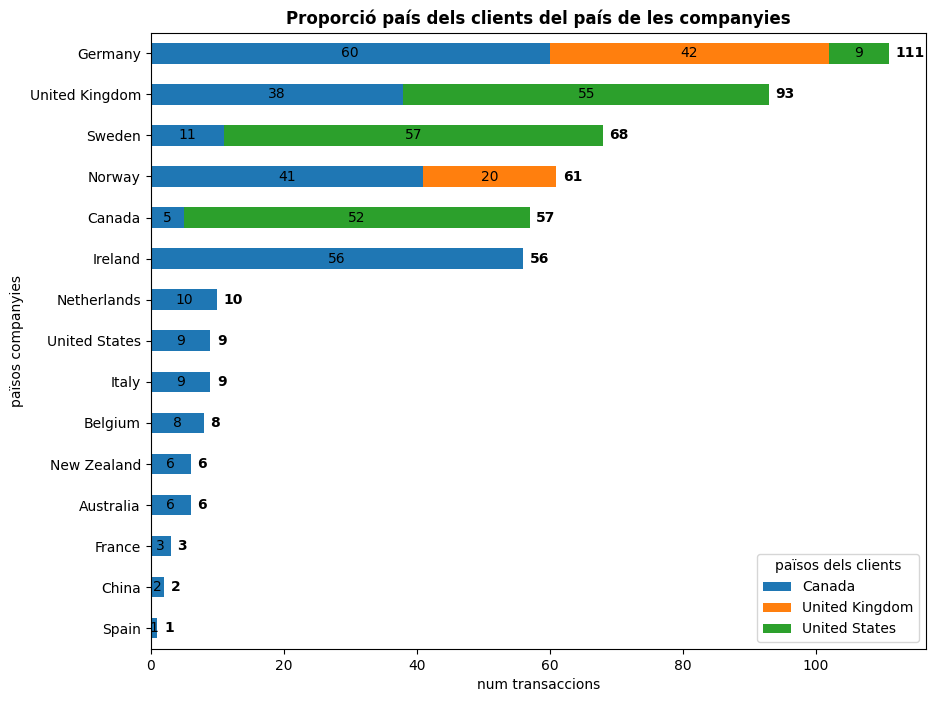

In [92]:


#No ho fem com pivot_df.plot.barh(stacked=True) per que ens pintaria també el total i no la volem visualitzar
ax=pivot_df[["Canada","United Kingdom","United States"]].plot.barh(stacked=True)

fig = ax.figure
# Ajustar las dimensiones de la figura
fig.set_size_inches(10, 8)
ax.set_title("Proporció país dels clients del país de les companyies",fontweight='bold')
ax.set_xlabel("num transaccions")
ax.set_ylabel("països companyies")
legend=ax.legend()
legend.set_title("països dels clients")

  
# Iterar sobre els contenidos i les barres per pintar cada valor de cada barra al centre de la barra.
for container in ax.containers:
    labels = []
    for bar in container:
        value = bar.get_width()
        if value == 0:
            labels.append('')  # No etiquetar barras con valor cero
        else:
            labels.append(f'{value:.0f}')
    ax.bar_label(container, labels=labels,label_type='center')

totals=pivot_df["Total"]


#Pintar els últims valors del total de les barres horitzontals i formatejar-los en negreta
for i, total in enumerate(totals):
    ax.text(total + 1, i, str(int(total)), va='center', ha='left', fontweight='bold')  # Ajusta la posición según sea necesario

# Treure les quadrícules del fons
ax.grid(False)
plt.show()

**Comentaris del gràfic**: Els clients de Canadà hem vist anteriorment que no eren majoritaris de tots els clients potencials ja que només suposaven el 27,3% dels usuaris potencials a diferència d'EUA que suposaven el 54,5% de tots els usuaris. Pero en canvi, el gràfic de barres horitzontal anterior
es pot veure que per quasi totes les vendes, els Canadencs a tots els països, són els principals compradors. Pero en canvi, en els països del top 6 en vendes, els usuaris Canadens només tindrien més pes, en les compres a empreses d'Alemanya, Noruega i d'Irlanda. Es realment sorprenent que totes les compres a empreses d'Irlanda són d'usuaris Canadencs. Si bé EUA no participa en totes les vendes de totes les empreses origen, sí és destacable que els seus usuaris tenen molt de pes en les compres a empreses del Regne Unit, Suència i Canadà que formen part dels països del top 5 en vendes. Com que els usuaris del top 5 suposen més del 80% de les vendes, vol dir que aquest usuaris d'EUA s'haurien de fidelitzar. 
Finalment és bastant revelador que els Canadencs no compren productes del propi Canadà. Segurament per ells mateixos tenen mala reputació les empreses del seu país.  Aquest gràfic només s'ha fet amb número de transaccions doncs estem comparant variables categòriques. Ara bé, si en l'eix x possésim vendes, treuríem millors conclusions que ara que només és proporció de transaccions.


#### **Exercici 6**

##### Tres variables

**Tria de les variables i del gràfic escollit**: Com que l'enunciat ens demana tres variables, aquí tenim més llibertat de triar entre numèriques i categòriques. Podríem haver triat el camí fàcil, i escollir l'histograma de barres horitzontals de l'exercici 5 que comparava dues categòries, afegint el total de vendes per les dues categòries,
de manera que ja hauríem aconseguit l'objectiu de tenir el gràfic de les tres variables. Però com que hem fet aquest curs per aprendre i no per acabar ràpid, hem seleccionat un gràfic on l'eix x tindrem les categories del paísos de les empreses del top 5 en vendes, i en l'eix y el boxplot de les vendes per país. I per introdüir la tercera variable, categoritzarem per tal que per cada país veiem el boxplot de les vendes acceptades front el de les vendes declinades. 


In [93]:
df_trans_merge_company=df["transactions"].merge(df["companies"],how="inner",left_on="business_id",right_on="company_id")

son_paisos_top_5=df_trans_merge_company["country"].isin(["Germany","United Kingdom","Sweeden","Ireland","Norway","Canada"])
df_trans_merge_company_top_5=df_trans_merge_company[son_paisos_top_5]


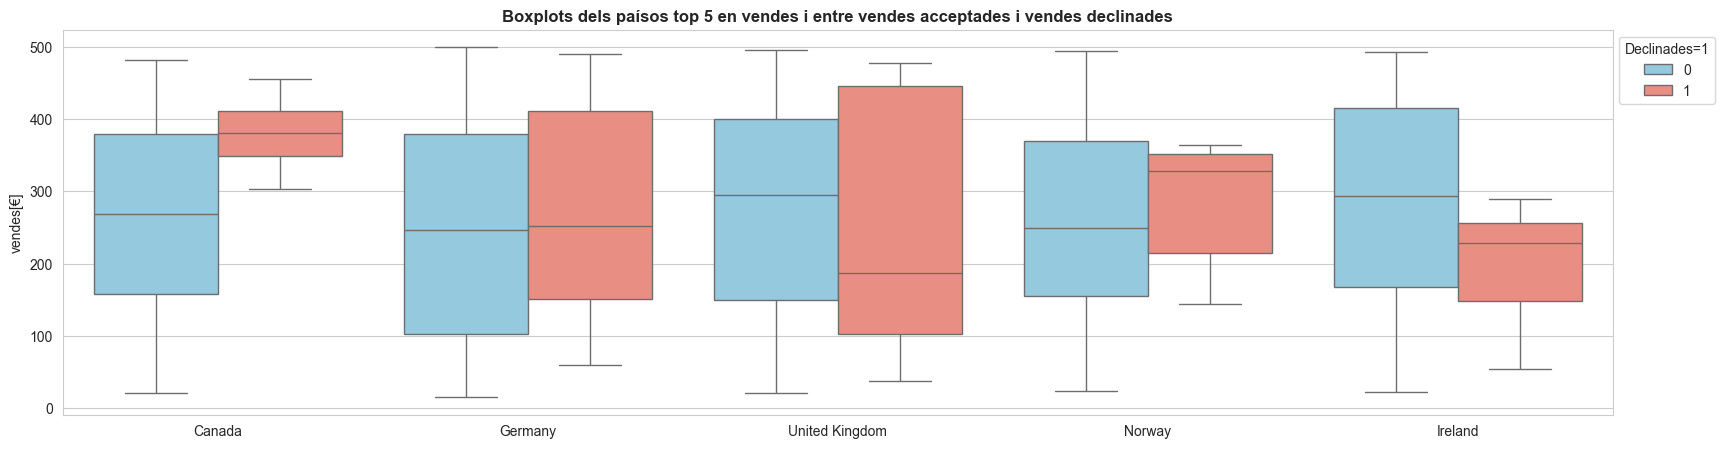

In [94]:
plt.figure(figsize=(20, 5))
sns.set_style("whitegrid")

custom_palette = ['skyblue', 'salmon']

ax=sns.boxplot(x="country",y="amount",data=df_trans_merge_company_top_5, hue="declined",palette=custom_palette)
ax.set_title("Boxplots dels paísos top 5 en vendes i entre vendes acceptades i vendes declinades",fontweight='bold')
#ax.set_xticklabels(["venda acceptada","venda declinada"])
#Per tal que no apareixi la etiqueta country a l'eix x
ax.set_xlabel("     ")
ax.set_ylabel("vendes[€]")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="Declinades=1")
plt.legend(title='Declinades=1', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()




**Comentaris del gràfic**: El primer que podem comprovar es que de les transaccions NO declinades, (quan declinades=0), totes les transaccions tenen una dispersió força semblant (mida de les caixes), a excepció de Noruega que tant el percentil 25% com el 75%, són una mica més reduïts que els dels altres països del top 5. Aquest gràfic també ens dóna molta informació respecte la comparació de les medianes de les vendes pels països del top 5. Pràcticament, les vendes medianes per païs són bastant semblants (ratlla intermitja del boxplot), tot i que és curiós que Alemania que és el país amb més ventes en total, és dels que té una mediana més baixes. Per tant, els usuaris que compren a Alemanya són d'un perfil de gastar menys, però compren molt més sovint. 

Si visualitzem els boxplot per país de les vendes declinades (declinades=1), viem que hi ha una gran variació de la desviació estàndar, així com de les medianes. Si recordem, sabem que de 587 transaccions en total, 500 eren transaccions acceptades i 87 no acceptades. 87 és una mostra molt petita, i aleshores fa, que hi hagi una variabilitat més alta ja que són pocs punts representatius per les poblacions de cada país. El que és destacable, es que Alemanya que és el país amb més vendes, té un boxplot molt semblant  tant per les vendes acceptades com per les declinades. En quan a United Kindom, el segon país amb més vendes, té una mediana de transaccions declinades molt més baixa que el de les seves transaccions acceptades, per tant és un país que aquest risc és menys important que el d'Alemanya. Sí hauríem de tenir el número de transaccions declinades per abmdós països per treure més conclusions.

Finalment fora del Boxplot no hi ha punts fora dels bigotis, per tan podem dir que de les 587 transaccions no n'hi hauria cap que siguiu outlier. 



#### **Exercici 7** 

##### Graficar un pairplot

Graficarem un pairplot a partir de totes les variables numèriques que tenim a la taula de transaccions

**Tria de les variables i configuració del pairplot escollit**: En aquest cas, hem optat per fer una query directament desde python a MySQL utilizant la connexió sqlalchemy(la més compatible amd pandas)  i el mètode pandas read_sql, ja que s'havien de fer varis creuaments i era més senzill obtenir-la amb MySQL que amb merge. Hem partit de la taula de trans_x_product, que té el identificador de la transacció i el número de producte. Hem anat portant en aquesta taula totes les variables numèriques de la taula productes, com el preu, el pes. 
Per portar-nos la venda per transacció amount (venda per transacció), hem considerat portar el promig, ja que sinó estaríem amplificant el valor d'amount per aquesta taula. Es a dir, si a la taula trans_x_product, per la mateixa transacció s'han venut tres productes diferents, el valor d'amount, aquí serà amount/3, que l'anomenarem preu mig per transacció i producte, però per simplificar l'anomenarem preu_mix_x_trans. També hem portat la latitud i longitud de la taula transaccions per ser variables numèriques encara que al final al pairplot no les pintarem, però si les farem servir posteriorment a l'exericic següenjt. Només pintarem el preu, pes i la venda_prod_i_trans.




In [95]:
engine=create_engine(url_conexion)
cnx=engine.connect()
inspector=inspect(engine)

#En aquest cas pels càlculs que hem de fer ens surt a compte fer una query a sql

sql_ex_7="""WITH count_prod_x_trans AS(
        SELECT
            tp.id,
            COUNT(tp.product_ids) count_prod
            FROM trans_x_product tp
            GROUP BY tp.id
            ORDER BY tp.id ASC),
        amount_x_prod AS 
        (SELECT
            t.id,
            t.lat,
            t.longitude,
            t.user_id,
            (t.amount/cp.count_prod) amount_x_prod
        FROM transactions t
        INNER JOIN count_prod_x_trans cp ON cp.id=t.id
        ORDER BY t.id ASC)
        SELECT
            t.id,
            p.price,
            p.weight,
            t.amount_x_prod,
            t.lat,
            t.longitude,
            u.birth_date
        FROM trans_x_product tp
        INNER JOIN products_ids p ON p.id=tp.product_ids
        INNER JOIN amount_x_prod t ON t.id=tp.id
        INNER JOIN users u ON u.id=t.user_id;"""


df_preu_pes_amount_lat_long_x_trans=pd.read_sql(sql_ex_7,cnx)
    
cnx.close()

#A la taula trans_x_product, que per cada transacció té el seu producte hem portat el preu i el pes
#de la taula products_ids. Aleshores també hem portat la variable amount de la taula transactions, però
#l'hem repartit pel número de vegades que aparexia la mateixa transacció. Ho hem fet perquè sinó estaríem
#afegint un amount massa gran per cada fila. Per exemple, si la transacció 1, va vendre els productes 2,5,i 7.
#i el total d'amount de la transacció 1 era de 100, aquí posarem com a venta per cada fila 33, doncs 100 és pel total
#de tots els productes venuts per la mateixa transacció.
df_preu_pes_amount_lat_long_x_trans.columns=["id","preu","pes","preu_mig_x_trans","lat","long","any_naix"]
df_preu_pes_amount_lat_long_x_trans

,id,preu,pes,preu_mig_x_trans,lat,long,any_naix
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,161.11,1.0,155.640,81.91850,-12.5276,"Sep 21, 1984"
1,02C6201E-D90A-1859-B4EE-88D2986D3B02,60.33,0.6,155.640,81.91850,-12.5276,"Sep 21, 1984"
2,02C6201E-D90A-1859-B4EE-88D2986D3B02,103.73,2.7,155.640,81.91850,-12.5276,"Sep 21, 1984"
3,0466A42E-47CF-8D24-FD01-C0B689713128,59.80,0.6,16.510,-43.96950,-117.5250,"May 15, 1987"
4,0466A42E-47CF-8D24-FD01-C0B689713128,82.15,2.7,16.510,-43.96950,-117.5250,"May 15, 1987"
...,...,...,...,...,...,...,...
1452,FD89D51B-AE8D-77DC-E450-B8083FBD3187,114.09,1.0,50.180,8.01217,-64.6715,"Dec 21, 1994"
1453,FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65,26.66,1.0,42.320,-77.86050,-172.3460,"Mar 23, 1992"
1454,FE809ED4-2DB6-55AC-C915-929516E4646B,169.96,2.7,109.915,-46.07510,-142.2420,"Dec 21, 1993"
1455,FE809ED4-2DB6-55AC-C915-929516E4646B,59.80,0.6,109.915,-46.07510,-142.2420,"Dec 21, 1993"


<Figure size 1000x500 with 0 Axes>

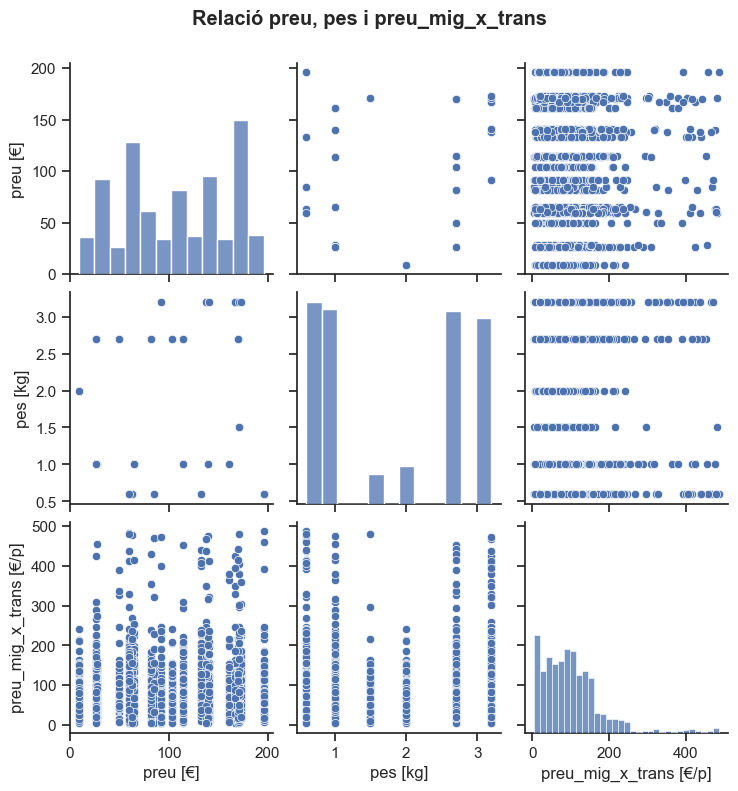

In [96]:
import seaborn as sns

                                      
#La invocación más simple utiliza scatterplot()para cada emparellament de variables i histplot()pels gràfics marginals al llarg de la diagonal:
plt.figure(figsize=(10, 5))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)              
plot=sns.pairplot(data=df_preu_pes_amount_lat_long_x_trans,
            vars=["preu","pes","preu_mig_x_trans"])
 
plot.figure.suptitle("Relació preu, pes i preu_mig_x_trans",y=1.05,fontweight='bold')
 
plot.axes[0,0].set(ylabel="preu [€]")
plot.axes[1,0].set(ylabel="pes [kg]")
plot.axes[2,0].set(ylabel="preu_mig_x_trans [€/p]")
   
plot.axes[2,0].set(xlabel="preu [€]")
plot.axes[2,1].set(xlabel="pes [kg]")
plot.axes[2,2].set(xlabel="preu_mig_x_trans [€/p]") 

             
                                         
plt.show()

**Comentaris del gràfic**: Aquest gràfic per defecte si no li diem res i posem les tres variables, en la diagonal ens representa un histograma i els altres gràfics són de dispersió entre comparació de les variables. Aquest gràfic ens permet fer totes les combinacions de gràfics de dispersió entre les dues variables, en aquest cas preu, pes i preu mig per trans. D'aquesta manera en un mateix gràfic, ja podem veure si ha una correlació entre alguna combinació d'aquestes variables amb els gràfics de dispersió entre elles.Per posar un exemple, La relació entre el preu i el pes sembla portar a una correlació molt baixa, doncs no es veu cap tendència tal com ja havíem vist a l'exercici 2 de Nivell 1. Si ens fixem en la relació entre el preu (eix x) i el preu mig per transacció (eix y), sí veiem que per cada preu, sembla que hi hagi un preu mig de productes més probable encara que amb una dispersió no massa baixa. Però si ho mirem bé, no és així ja que una transacció pot estar formada per preus molt variats de diferents productes i per tant el preu mig podrà ser més semblant o no al preu dels productes, en funció de si els preus dels productes per transacció són molt homogenis. De fet podrem veure aquesta correlació si es baixa o no amb l'exercici 1 del Nivell 2 de la matriu de correlacions.

A la diagonal del pairplot, com que no hem configurat res ja que és el que volíem, ens apareix les distribucions en forma d'histograma de cada una de les variables numèriques d'estudi. El preu té una distribució amb combinacions de freqüències altes i baixes, però en general no té una distribució de camapana de Gauss. Pel pes sembla que tenim més concentració de productes amb pes inferir a 1 kg o bé una alta concentració per productes amb preu superior a 2,7 kg. Els productes amb preus diferents a aquests dos rangs inferiors i superiors no s'han venut molt menys (no hem pogut investigar, per veure l'escala de freqüències de l'histograma)

Finalment la distribució del preu mig_x_transac sí mostra una distribució més normal, encara que sesgada una mica cap a la dreta, és a dir no simètrica i amb alguns punts anòmals per sobre de 220 €/trans i prod. En realitat no és cap sorpresa, doncs aquesta variable l'estem calculant com una mitjana, i per teòria estadística, les mostres de les mitjanes haurien de tenir una distribució normal. 




## **Nivell 2**

#### **Exercici 1**

#### Correlació entre totes les variables

**Tria de variables i gràfic escollit**: De l'exercici anterior teniem una DataFrame anomenat df_preu_pes_amount_lat_long_x_trans que tenia forces variables numèriques del resultat de portar-nos variables numèriques a la taula trans_x_product. Aquesta taula recordem té 1457 files df_preu_pes_amount_lat_long_x_trans.info() sense nulls i conté
per cada transacció (id), el preu, el preu del producte, el pes, el preu_mig_x_trans (preu mig dels productes de la mateixa transacció calculats amb amount), la lat, long i el any de naixement. L'any de naixement ens l'hem portat de la taula users, ja que per cada transacció i ha un usuari associat. Aleshores el primer que farem és mitjançant pandas, en un seguit de passos trobar l'edat dels usuaris, per tal de disposar d'una altra variable numèrica adicional.

In [97]:
df_preu_pes_amount_lat_long_x_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1457 non-null   object 
 1   preu              1457 non-null   float64
 2   pes               1457 non-null   float64
 3   preu_mig_x_trans  1457 non-null   float64
 4   lat               1457 non-null   float64
 5   long              1457 non-null   float64
 6   any_naix          1457 non-null   object 
dtypes: float64(5), object(2)
memory usage: 79.8+ KB


In [98]:
#Com que hem vist que en algun moment, any_naix no és del tipus datetime, ho convertim.
df_preu_pes_amount_lat_long_x_trans["any_naix"]=pd.to_datetime(df_preu_pes_amount_lat_long_x_trans["any_naix"])
df_preu_pes_amount_lat_long_x_trans.head(2)

,id,preu,pes,preu_mig_x_trans,lat,long,any_naix
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,161.11,1.0,155.64,81.9185,-12.5276,1984-09-21
1,02C6201E-D90A-1859-B4EE-88D2986D3B02,60.33,0.6,155.64,81.9185,-12.5276,1984-09-21


In [99]:
#Funció per trobar l
def extr_edad(data):
    
    any_actual=int(datetime.now().year)  
    #any_naix=int(str(cadena[-4:]))
    any_naix=int(data.year)
    return(any_actual-any_naix)

df_preu_pes_amount_lat_long_x_trans["edat"]=df_preu_pes_amount_lat_long_x_trans["any_naix"].apply(extr_edad)
df_preu_pes_amount_lat_long_x_trans.head()


,id,preu,pes,preu_mig_x_trans,lat,long,any_naix,edat
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,161.11,1.0,155.64,81.9185,-12.5276,1984-09-21,40
1,02C6201E-D90A-1859-B4EE-88D2986D3B02,60.33,0.6,155.64,81.9185,-12.5276,1984-09-21,40
2,02C6201E-D90A-1859-B4EE-88D2986D3B02,103.73,2.7,155.64,81.9185,-12.5276,1984-09-21,40
3,0466A42E-47CF-8D24-FD01-C0B689713128,59.80,0.6,16.51,-43.9695,-117.5250,1987-05-15,37
4,0466A42E-47CF-8D24-FD01-C0B689713128,82.15,2.7,16.51,-43.9695,-117.5250,1987-05-15,37


Calculem la matriu de correlacions entre totes les variables numèriques

In [100]:
columnes=["preu","pes","preu_mig_x_trans","lat","long","edat"]
df_matriu_correlacions=df_preu_pes_amount_lat_long_x_trans[columnes].corr()
df_matriu_correlacions

,preu,pes,preu_mig_x_trans,lat,long,edat
preu,1.000000,0.194816,0.037811,-0.012937,0.045304,0.022323
pes,0.194816,1.000000,0.000844,-0.006266,-0.032691,0.012545
preu_mig_x_trans,0.037811,0.000844,1.000000,0.054857,0.041458,0.022049
lat,-0.012937,-0.006266,0.054857,1.000000,-0.003846,0.015911
long,0.045304,-0.032691,0.041458,-0.003846,1.000000,-0.037880
edat,0.022323,0.012545,0.022049,0.015911,-0.037880,1.000000


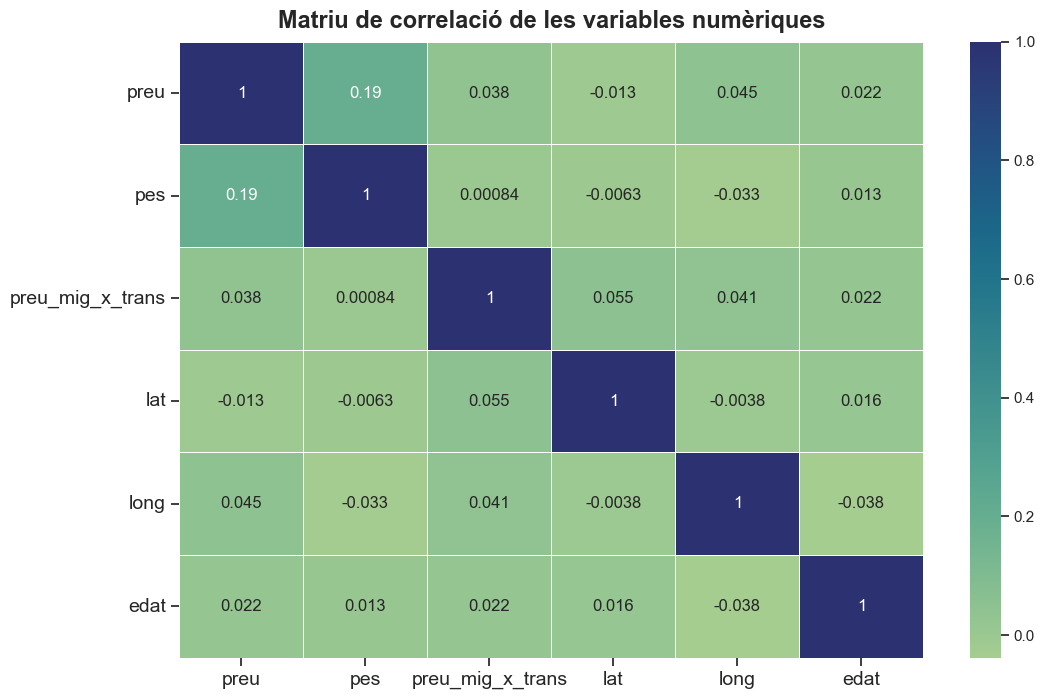

In [101]:
plt.figure(figsize=(12, 8))
grid=sns.heatmap(df_matriu_correlacions,cmap="crest",annot=True,linewidth=.5)
grid.axes.set_title("Matriu de correlació de les variables numèriques",pad=10,fontsize=17,fontweight='bold')
plt.xticks(fontsize=14, rotation=0)  # Tamaño y rotación de las etiquetas del eje x
plt.yticks(fontsize=14, rotation=0)
plt.show()

**Comentaris del gràfic**: Hem escollit un mapa de calor per visualitzar la matriu de correlacions de les variables numèriques que hem seleccionat, doncs 
visualment tot el que s'acosti a blau(per aquest gràfic) veurem ja visualment que són variables altament correlacionades.Obviament aquest mapa de calor sempre presentarà a la diagonal correlacions de la unitat, ja que és la relació d'una variable amb sí mateixa i per això es pintarà de blau. Podem veure que totes les correlacions entre totes les variables és molt i molt baixa. Per aquelles que la correlació és positiva, significa que hi ha una relació  positiva entre una variable i una altra. Es a dir si tinc una varible y que es correlaciona positivament amb  x, vol dir que qualsevol increment de x fa que la variable y tendeixi a augmentar amb una certa relació, que serà més exacta quan la correlació sigui més propera a 1. I quan les correlacions són negatives doncs és al revés, per qualsevol increment de la variable x, la variable correlacionada y tendiria a disminuiri el seu valor. 
Del mapa de calor, observem que la correlació més alta és entre el preu i el pes, amb una correlació postivia de 0,19, que tot i així es consideraria un valor molt baix.

#### **Exercici 2**

##### Implementa un joinplot

**Tria de les variables i configuració del joinplot**: El joinplot és un gràfic que pot visualitzar la relació entre dues variables numèriquesi a més a cada eix visualitza la distribució de cada una de les variables numèriques i la seva funció de densitat poblacional. Es interessant doncs veiem en un gràfic tres gràfics per dir-ho d'una manera. Hem escollit el pes i el preu doncs hem pensat que són les variables que tenien una correlació més alta en l'anterior gràfic. 

<Figure size 1200x800 with 0 Axes>

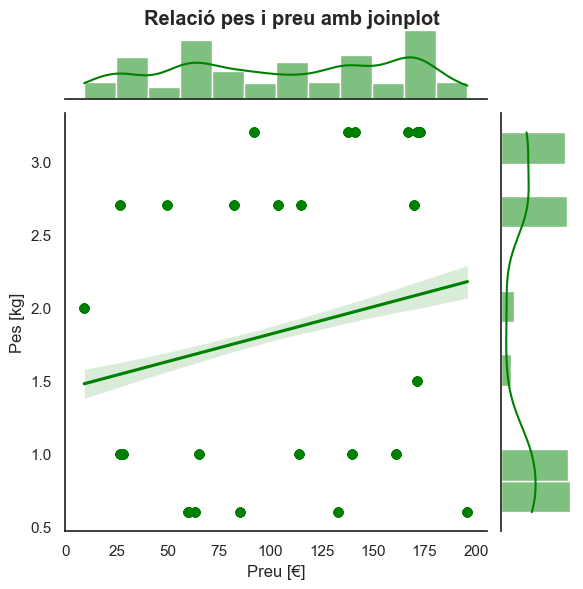

In [102]:
plt.figure(figsize=(12, 8))
sns.set_style("white")
sns.set_context("notebook")

#Per defecte si no escollim res ens triaria kind="reg", però ho posem perquè és el que volíem visualitzar
grid=sns.jointplot(x="preu",y="pes",data=df_preu_pes_amount_lat_long_x_trans,kind="reg",color="green")

grid.set_axis_labels("Preu [€]","Pes [kg]")
grid.figure.suptitle("Relació pes i preu amb joinplot", fontweight='bold')
grid.fig.subplots_adjust(top=0.95)
plt.show()

**Comentaris del gràfic**: Aquest gràfic conté molts gràfics comentats anteriorment. El gràfic de dispersió té els mateixos punts en 2D que l'exercici 2, però a més aquí com a valor afegit al haver afegit el paràmetre kind="reg" a la funció de sns.joinplot visualitzem una linea de tendència amb un interval de confiança de la regressió, que generalment és del 95%. Es a dir, si hagués una línea de tendència s'esperaria que caigués en aquest zona sombrejada amb una probabilitat del 95%. Els gràfics de distribució de l'hisotgrama de les variables pes i del preu s'han explicat quan hem explicat l'exercici 7 del Nivell 1, per tant seria repetir-nos.

## **Nivell 3**

#### **Exercici 1**

Implementa un violinplot combinat amb un altre tipus de gràfic

**Tria de les variable i combinació del violinplot escollida**: En aquest cas hem escollit com a variables, la variable categòrica dels paísos de les companyies, però només
pels països del topo 5 en vendes totals (tenen el 80% de les vendes totals), la variable numèrica de les vendes totals per transaccció. El violinplot mostra la distribució de la variable numèrica, en aquest cas les vendes per transacció per cada una dels valors de les categòries, els paísos. El valor afegit que té respecte el boxplot, és que el boxplot només et mostra certs estadístics, com la mediana i certs percentils i valors anòmals, però no mostra la densitat de probabilitat de com es distribueixen els valors numèrics per cada categoria com sí fa el violinplot.  
La combinació del swarmplot amb el violinplot amb seaborns, ens permet visualitzar dins del violinplot per categoria la distribució real de cada una dels valors de les vendes per transacció, fet que ens permet veure altres patrons, com concentració de punts en certes zones, etc.


C:\Users\Usuario\AppData\Local\Temp\ipykernel_34132\1732203817.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.violinplot(x="country",y="amount",data=df_trans_merge_company_top_5, palette=custom_palette)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_34132\1732203817.py:6: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax=sns.violinplot(x="country",y="amount",data=df_trans_merge_company_top_5, palette=custom_palette)


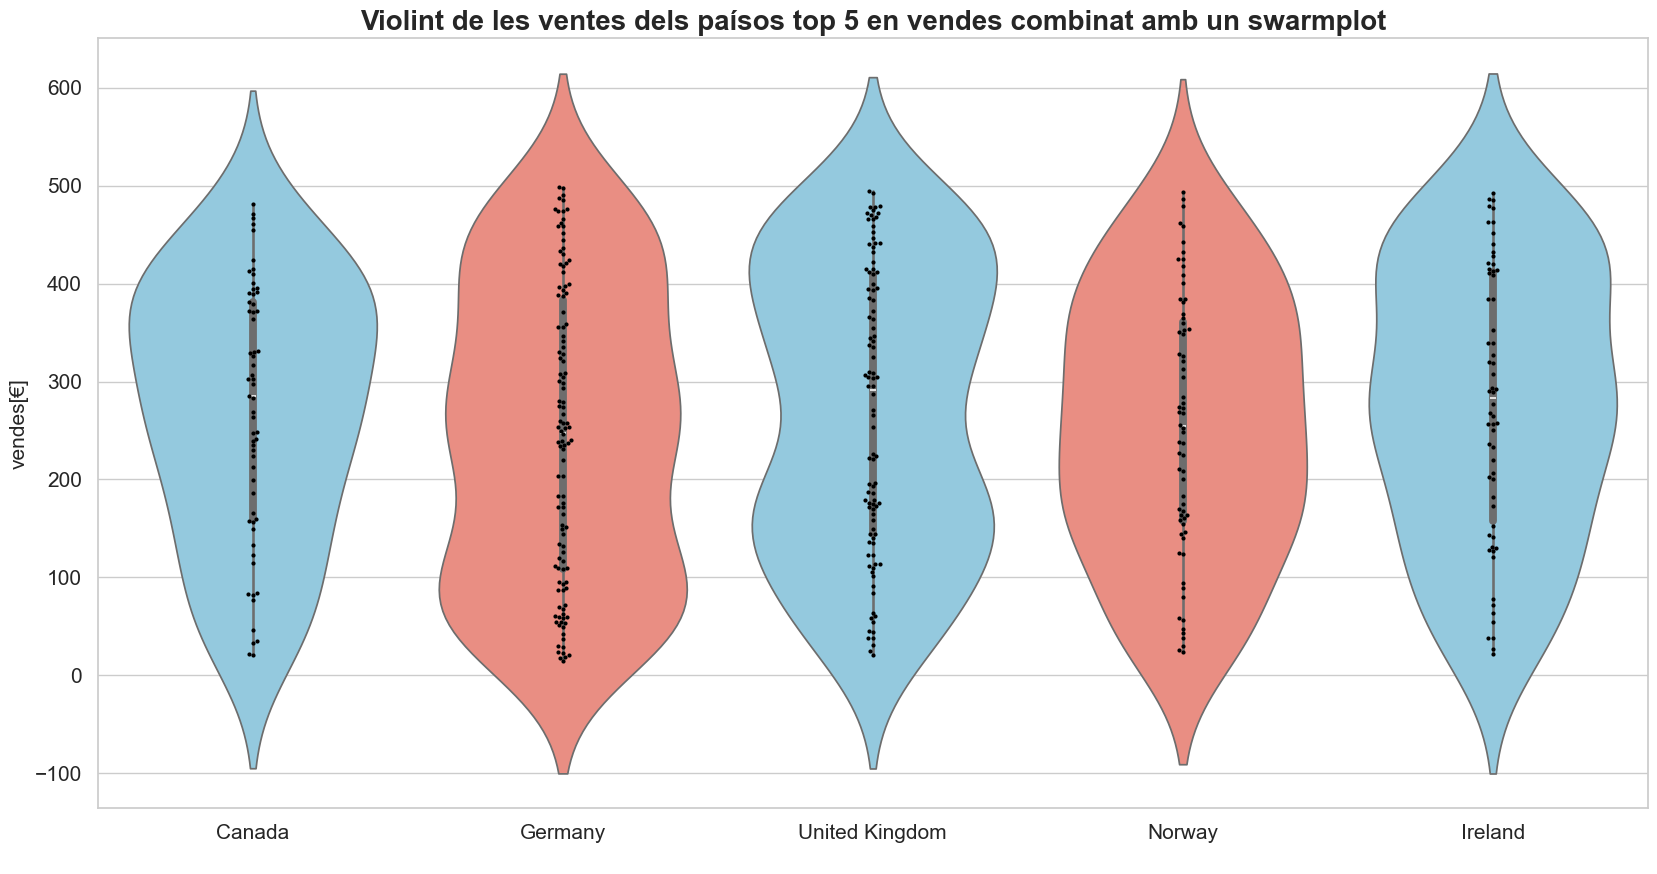

In [103]:
plt.figure(figsize=(20, 10))
sns.set_style("whitegrid")

custom_palette = ['skyblue', 'salmon']

ax=sns.violinplot(x="country",y="amount",data=df_trans_merge_company_top_5, palette=custom_palette)
ax=sns.swarmplot(x="country", y="amount", data=df_trans_merge_company_top_5,color='black',size=3);
ax.set_title("Violint de les ventes dels paísos top 5 en vendes combinat amb un swarmplot",fontsize=20,fontweight='bold')
#ax.set_xticklabels(["venda acceptada","venda declinada"])
#Per tal que no apareixi la etiqueta country a l'eix x
ax.set_xlabel("     ")
ax.set_ylabel("vendes[€]",fontsize=15)

# Aumentar el tamaño de los ejes x e y
ax.tick_params(axis='x', labelsize=15)  # Tamaño de la fuente de las etiquetas del eje x
ax.tick_params(axis='y', labelsize=15)  # Tamaño de la fuente de las etiquetas del eje y
ax.tick_params(axis='both', which='major', size=8)  # Tamaño de los números en los ejes x e y


plt.show()


**Comentaris del gràfic**: El violinplot com el boxplot també mostra la mediana de cada una de les variables numèriques, encara que no s'aprecci massa en el propi gràfic. Es la línea blanca al centre del violinplot. També podem veure els percentils del 25% i 75% en les caixes petites grises allargades per cada categòria dins de cada violinplot. Obviament ha de passar el mateix que havíem vist abans que hem vist amb els boxplots, que la mediana d'Alemanya és més baixa que la del Regne Unit tot i ser Alemanya el país líder en vendes.
Podem veure que si bé totes les distribucions no són iguals, sí tots els violinplots són simètrics, i per tan podem parlar de distribucions de densitat de població simètriques per tots els països top 5. .També podem veure que Canadà i Irlanda, per la forma dels seus respectius violinplot, tenen distribucions de densitat de població més semblants que les d'altres països. Al ser més amples per la part alta els seus violinplots, significa que tenen concentracions de valors per vendes més altes, en aquest cas al voltant de 400 €. Aquesta concentració més elevada de valors es visualitza amb el swarmplot, ja que podem veure la concentració de valors dins del mateix violinplot.
El Regne Unit encara que té una densitat de distribució simètrica, presenta més concentració de vendes per la part baixa i per la part alta del violinplot, al tenir amplada més gran als extrems i més prima al centre. Això es pot comprovar també en que es veu una concentració de punts més elevada per transaccións al voltant de 150 €/transacció i per la part alta per transaccións al voltant de 420 €/transacció i en canvi pel centre del violinplot, per transaccions de 250 € serien vendes menys probables que pels altres valors comentats.


#### **Exercici 2**

#### Genera un Facegrid per a visualitzar múltiples aspectes de les dades simultàniament

**Tria de les variables i configuració del Facegrid escollida:** Hem vist que l'edat dels usuaris que han comprat va de 20 a 45. Com que no hem vist masses patrons fins ara, ens semblarà interessant tenir una variable categòrica que categoritzi les edats en dos grups, entre 20 a 34 anys i de 35 a 45 anys. L'altre variable discreta continuarà sent els països del top 5 en vendes que ja hem comentat, i la tercera variable les vendes per transacció. En primer lloc com que partirem d'un df que conté les vendes i els països, la que es diu df_trans_merge_company_top_5 que ja hem usat anteriorment, doncs farem un merge, per portar-nos novament columes de la taula d'usaris, que la que ens interessa la birth_date

In [104]:
df_trans_merge_company_top_5_user=df_trans_merge_company_top_5.merge(df["users"], how="left", left_on="user_id",right_on="id")
df_trans_merge_company_top_5_user["birth_date"]


0      Sep 21, 1984
1      May 15, 1987
2      Jan 10, 1999
3       Aug 3, 1982
4      Aug 24, 1981
           ...     
404    Sep 30, 1979
405    Apr 16, 1991
406    Dec 21, 1994
407    Mar 23, 1992
408    Dec 21, 1993
Name: birth_date, Length: 409, dtype: object

In [105]:
#Convertim birth_date a datetime
df_trans_merge_company_top_5_user["birth_date"]=pd.to_datetime(df_trans_merge_company_top_5_user["birth_date"],format="%b %d, %Y")
df_trans_merge_company_top_5_user["birth_date"]

0     1984-09-21
1     1987-05-15
2     1999-01-10
3     1982-08-03
4     1981-08-24
         ...    
404   1979-09-30
405   1991-04-16
406   1994-12-21
407   1992-03-23
408   1993-12-21
Name: birth_date, Length: 409, dtype: datetime64[ns]

In [106]:
def extr_any(data):
    
    any_actual=int(datetime.now().year)  
    #any_naix=int(str(cadena[-4:]))
    any_naix=int(data.year)
    return(any_actual-any_naix)

df_trans_merge_company_top_5_user["edat"]=df_trans_merge_company_top_5_user["birth_date"].apply(extr_any)
df_trans_merge_company_top_5_user.head()


,id_x,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude,...,name,surname,phone_y,email_y,birth_date,country_y,city,postal_code,address,edat
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,-12.5276,...,Lynn,Riddle,1-387-885-4057,vitae.aliquet@outlook.edu,1984-09-21,United States,Bozeman,61871,"P.O. Box 712, 7907 Est St.",40
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9695,-117.5250,...,William,Benjamin,0800 1111,porttitor@icloud.ca,1987-05-15,United Kingdom,Coldstream,KY0 0DY,662-8112 Praesent Av.,37
2,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.3593,-100.5560,...,Chloe,Keith,022-178-1548,arcu.eu@protonmail.org,1999-01-10,Canada,Oliver,B5T 7L6,"P.O. Box 289, 3192 Cursus St.",25
3,09DE92CE-6F27-2BB7-13B5-9385B2B3B8E2,CcU-3071,b-2298,2021-05-11 20:40:06,303.05,1,"67, 7",275,71.1706,10.5757,...,Kenyon,Hartman,082-871-7248,convallis.ante.lectus@yahoo.com,1982-08-03,Canada,Richmond,R8H 2K2,8564 Facilisi. St.,42
4,0A476ED9-0C13-1962-F87B-D3563924B539,CcU-4359,b-2302,2022-02-26 20:33:54,430.49,0,"29, 41, 11",221,-56.4901,114.8010,...,Sasha,Emerson,024-226-4281,tempor.augue.ac@icloud.couk,1981-08-24,Canada,Watson Lake,H3X 9N3,885-8605 Egestas Rd.,43


In [107]:
def rg_edad(edat):
    
    if edat in range(20,35):
        return "20 a 34 anys"
    
    
    elif edat in range(35,46):
        return "35 a 45 anys"
    else:
        return "resto"
    
#Creem una columna nova per categoritzar l'edat en dos rangs 
df_trans_merge_company_top_5_user["rg_edat"]=df_trans_merge_company_top_5_user["edat"].apply(rg_edad)

df_trans_merge_company_top_5_user.head()

,id_x,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude,...,surname,phone_y,email_y,birth_date,country_y,city,postal_code,address,edat,rg_edat
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,-12.5276,...,Riddle,1-387-885-4057,vitae.aliquet@outlook.edu,1984-09-21,United States,Bozeman,61871,"P.O. Box 712, 7907 Est St.",40,35 a 45 anys
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9695,-117.5250,...,Benjamin,0800 1111,porttitor@icloud.ca,1987-05-15,United Kingdom,Coldstream,KY0 0DY,662-8112 Praesent Av.,37,35 a 45 anys
2,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.3593,-100.5560,...,Keith,022-178-1548,arcu.eu@protonmail.org,1999-01-10,Canada,Oliver,B5T 7L6,"P.O. Box 289, 3192 Cursus St.",25,20 a 34 anys
3,09DE92CE-6F27-2BB7-13B5-9385B2B3B8E2,CcU-3071,b-2298,2021-05-11 20:40:06,303.05,1,"67, 7",275,71.1706,10.5757,...,Hartman,082-871-7248,convallis.ante.lectus@yahoo.com,1982-08-03,Canada,Richmond,R8H 2K2,8564 Facilisi. St.,42,35 a 45 anys
4,0A476ED9-0C13-1962-F87B-D3563924B539,CcU-4359,b-2302,2022-02-26 20:33:54,430.49,0,"29, 41, 11",221,-56.4901,114.8010,...,Emerson,024-226-4281,tempor.augue.ac@icloud.couk,1981-08-24,Canada,Watson Lake,H3X 9N3,885-8605 Egestas Rd.,43,35 a 45 anys


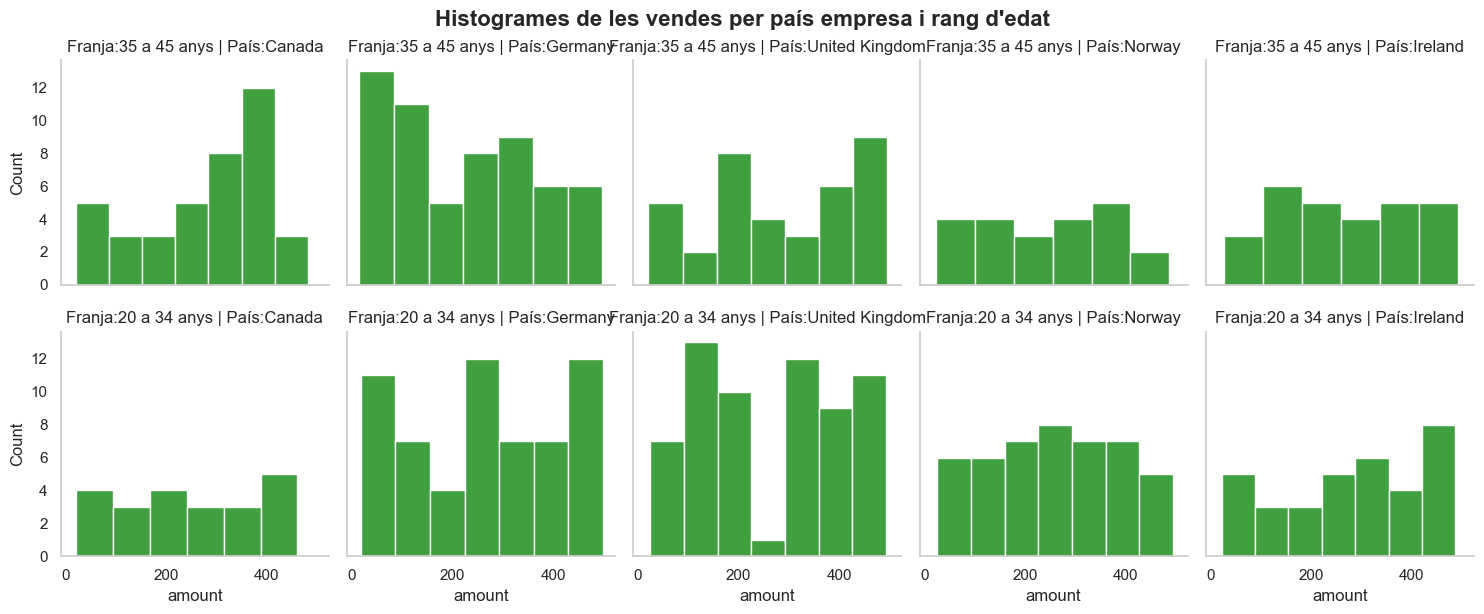

In [108]:
g=sns.FacetGrid(df_trans_merge_company_top_5_user, row="rg_edat",  col="country_x",palette="crest")
g.map_dataframe(sns.histplot, x="amount",color="green")

# Personalizar los títulos de los subgráficos
g.set_titles(row_template='Franja:{row_name}', col_template='País:{col_name}')

# Quitar el grid de los gráficos
#g.set(grid=False)

fig = ax.figure
g.fig.suptitle("Histogrames de les vendes per país empresa i rang d'edat", fontsize=16, fontweight='bold', y=1.02)
# Ajustar las dimensiones de la figura
fig.set_size_inches(30, 30)

#Desactivar el grid per cada un dels subgràfics
for ax in g.axes.flatten():
    ax.grid(False)

plt.show()

**Comentaris del gràfic**: El FaceGrid és com el pairplot però amb dimensió més per fer més combinacions entre tres variables. En aquest cas hem optat per graficar
en cada minigràfic l'histograma de les vendes, i per la primera fila tenim els histogrames categoritzats per usuaris amb edats entre 35 a 45 anys, i per la segona fila per edats entre 20 a 34 anys. La segona categoria que es per cada columna és per país de les empreses. Així doncs amb un únic gràfic tenim moltes combinacions d'histogrames i per això també es diuen histogrames condicionasl. La distribució que són més homogències correspen al histograma de Franja de 20 a 34 anys, per Noruega, canada i Irlanda. També presenta histogrames uniformes per edats entre 35 a 45 anys per Noruega i Irlanda. 

En canvi els usuaris de 35 a 45 anys Alemanya té com un histograma sesgat a la dreta, i també per vendes més petites les freqüències són més altes.

L'histograma que presentaria algo més semblant a una campana de Gauss serien els usuaris d'edat entre 20 i 45 anys de Canadà, tot i que no seria del tot simètric amb una mitja centrada probablement a 250 €/trans.
